<a href="https://colab.research.google.com/github/mansi-se/amazonai/blob/main/Copy_of_Machine_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for train-test split
from sklearn.model_selection import train_test_split

# for scaling data
from sklearn.preprocessing import StandardScaler

# for linear regression
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# setting color palette
sns.set_palette('Blues_d')

In [ ]:
# reading dataset
df = pd.read_csv('/content/medical_cost.csv')

In [ ]:
# displaying first few records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# inspecting data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# duplicate records
sum(df.duplicated())

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
# inspecting object data type columns for data quality
object_columns = list(df.select_dtypes(include = 'object').columns)

for column in object_columns:
  print(f'{column}:\n{df[column].unique()}', end = '\n\n')

sex:
['female' 'male']

smoker:
['yes' 'no']

region:
['southwest' 'southeast' 'northwest' 'northeast']



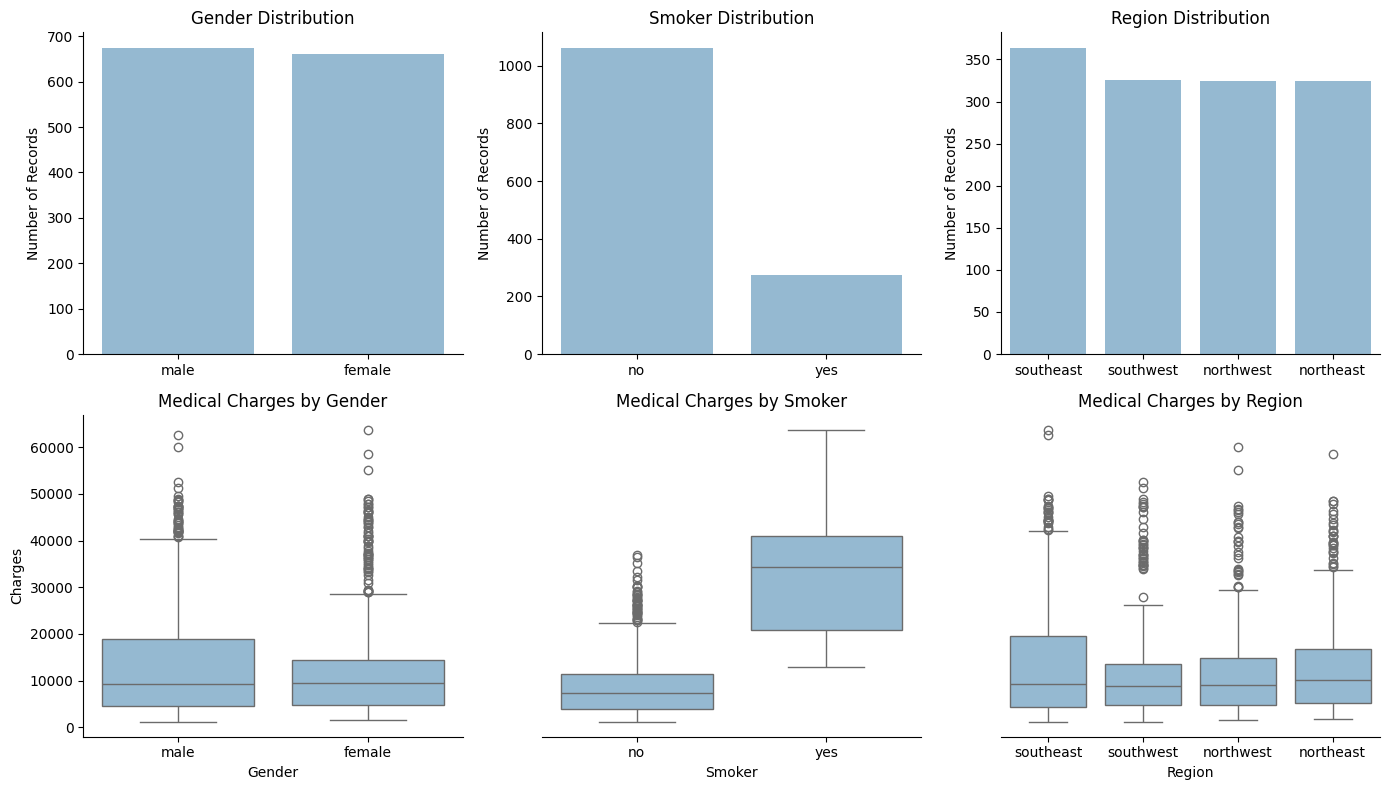

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8))
sns.countplot(data = df, x = 'sex', order = df['sex'].value_counts().index, ax = axs[0][0])
axs[0][0].set_title('Gender Distribution')
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('Number of Records')
axs[0][0].spines[['top', 'right']].set_visible(False)
sns.countplot(data = df, x = 'smoker', order = df['smoker'].value_counts().index, ax = axs[0][1])
axs[0][1].set_title('Smoker Distribution')
axs[0][1].set_xlabel('')
axs[0][1].set_ylabel('Number of Records')
axs[0][1].spines[['top', 'right']].set_visible(False)
sns.countplot(data = df, x = 'region', order = df['region'].value_counts().index, ax = axs[0][2])
axs[0][2].set_title('Region Distribution')
axs[0][2].set_xlabel('')
axs[0][2].set_ylabel('Number of Records')
axs[0][2].spines[['top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'sex', y = 'charges', order = df['sex'].value_counts().index, ax = axs[1][0])
axs[1][0].set_title('Medical Charges by Gender')
axs[1][0].set_xlabel('Gender')
axs[1][0].set_ylabel('Charges')
axs[1][0].spines[['top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'smoker', y = 'charges', order = df['smoker'].value_counts().index, ax = axs[1][1])
axs[1][1].set_title('Medical Charges by Smoker')
axs[1][1].set_xlabel('Smoker')
axs[1][1].set_ylabel('')
axs[1][1].set_yticks([])
axs[1][1].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'region', y = 'charges', order = df['region'].value_counts().index, ax = axs[1][2])
axs[1][2].set_title('Medical Charges by Region')
axs[1][2].set_xlabel('Region')
axs[1][2].set_ylabel('')
axs[1][2].set_yticks([])
axs[1][2].spines[['left', 'top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
# statistical summary
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


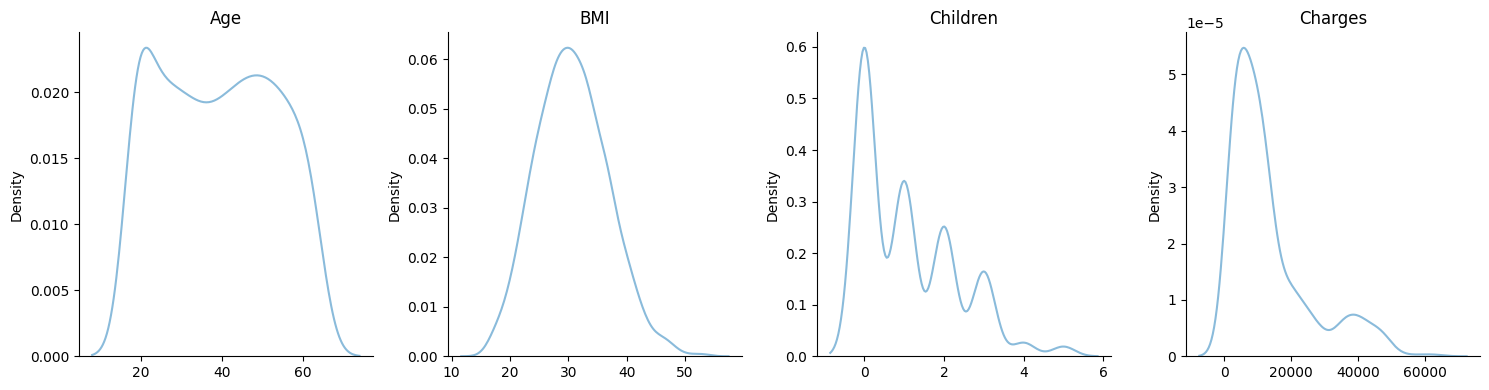

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))
sns.kdeplot(data = df, x = 'age', ax = axs[0])
axs[0].set_title('Age')
axs[0].set_xlabel('')
axs[0].spines[['top', 'right']].set_visible(False)
sns.kdeplot(data = df, x = 'bmi', ax = axs[1])
axs[1].set_title('BMI')
axs[1].set_xlabel('')
axs[1].spines[['top', 'right']].set_visible(False)
sns.kdeplot(data = df, x = 'children', ax = axs[2])
axs[2].set_title('Children')
axs[2].set_xlabel('')
axs[2].spines[['top', 'right']].set_visible(False)
sns.kdeplot(data = df, x = 'charges', ax = axs[3])
axs[3].set_title('Charges')
axs[3].set_xlabel('')
axs[3].spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

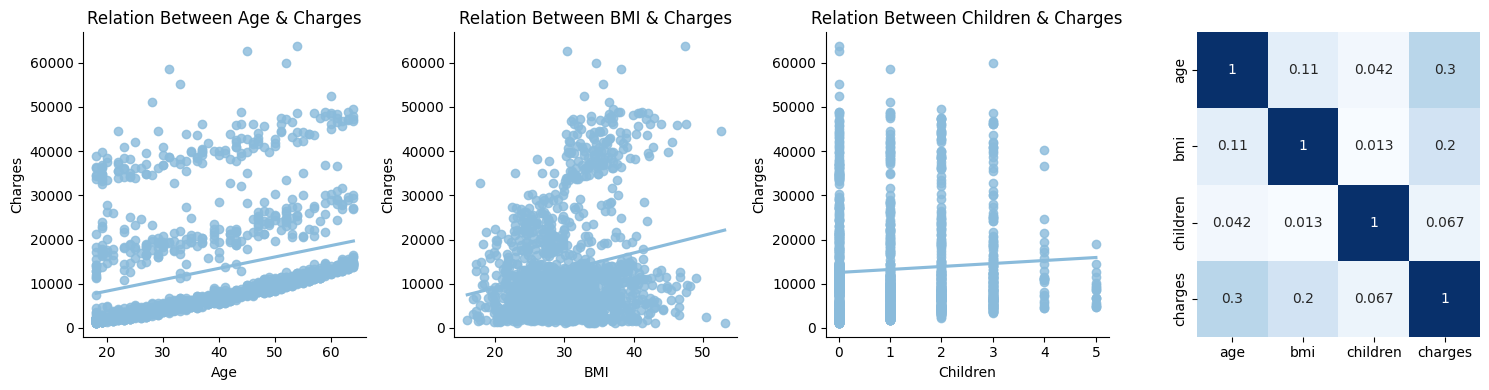

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))
sns.regplot(data = df, x = 'age', y = 'charges', ci = False, ax = axs[0])
axs[0].set_title('Relation Between Age & Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charges')
axs[0].spines[['top', 'right']].set_visible(False)
sns.regplot(data = df, x = 'bmi', y = 'charges', ci = False, ax = axs[1])
axs[1].set_title('Relation Between BMI & Charges')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Charges')
axs[1].spines[['top', 'right']].set_visible(False)
sns.regplot(data = df, x = 'children', y = 'charges', ci = False, ax = axs[2])
axs[2].set_title('Relation Between Children & Charges')
axs[2].set_xlabel('Children')
axs[2].set_ylabel('Charges')
axs[2].spines[['top', 'right']].set_visible(False)
sns.heatmap(data = df.select_dtypes(exclude = 'object').corr(), annot = True, cmap = 'Blues', cbar = False, ax = axs[3])
plt.tight_layout()
plt.show()

- Depedent variable linear relation with independent variable
- No multicollinearity - independent variable should not be correlated to each other

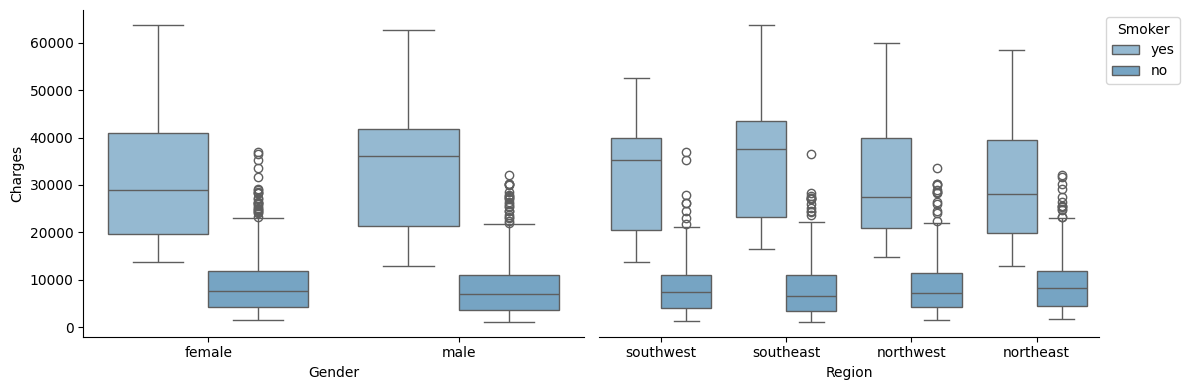

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
# interaction between smoker and sex on charges
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'smoker', ax = axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Charges')
axs[0].legend().set_visible(False)
axs[0].spines[['top', 'right']].set_visible(False)
# interaction between smoker and region on charges
sns.boxplot(data = df, x = 'region', y = 'charges', hue = 'smoker', ax = axs[1])
axs[1].set_xlabel('Region')
axs[1].set_ylabel('')
axs[1].set_yticks([])
axs[1].legend(title = 'Smoker', bbox_to_anchor = (1, 1), loc = 'upper left')
axs[1].spines[['left', 'top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

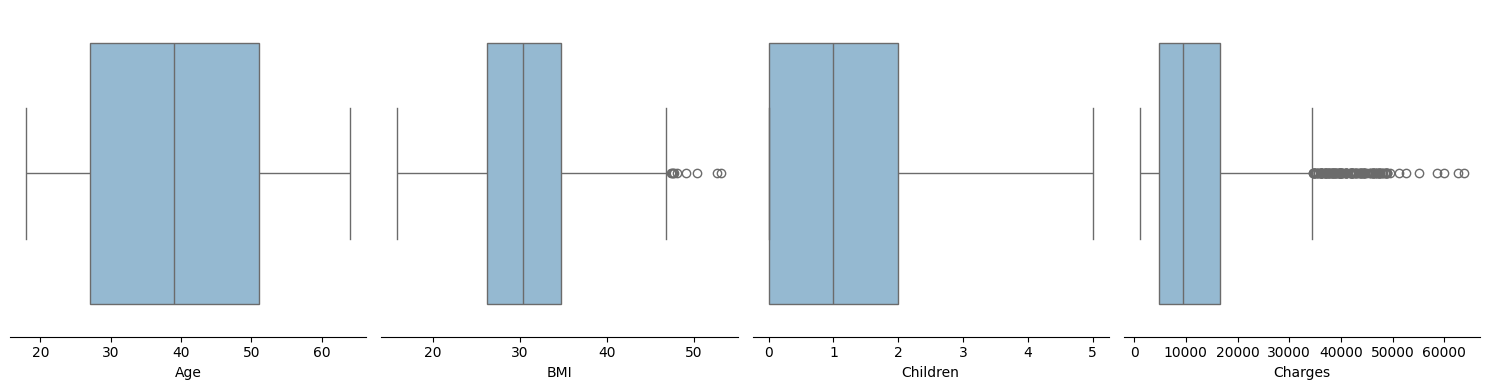

In [ ]:
# outlier detection
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))
sns.boxplot(data = df, x = 'age', ax = axs[0])
axs[0].set_xlabel('Age')
axs[0].set_yticks([])
axs[0].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'bmi', ax = axs[1])
axs[1].set_xlabel('BMI')
axs[1].set_yticks([])
axs[1].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'children', ax = axs[2])
axs[2].set_xlabel('Children')
axs[2].set_yticks([])
axs[2].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'charges', ax = axs[3])
axs[3].set_xlabel('Charges')
axs[3].set_yticks([])
axs[3].spines[['left', 'top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# iqr (inter quartile range) method of outlier treatment
numerical_columns = list(df.select_dtypes(exclude = 'object').columns)

for column in numerical_columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  iqr = q3 - q1

  lower_limit = q1 - (1.5 * iqr)
  upper_limit = q3 + (1.5 * iqr)

  # np.where(condition, if true, if false)
  df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
  df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

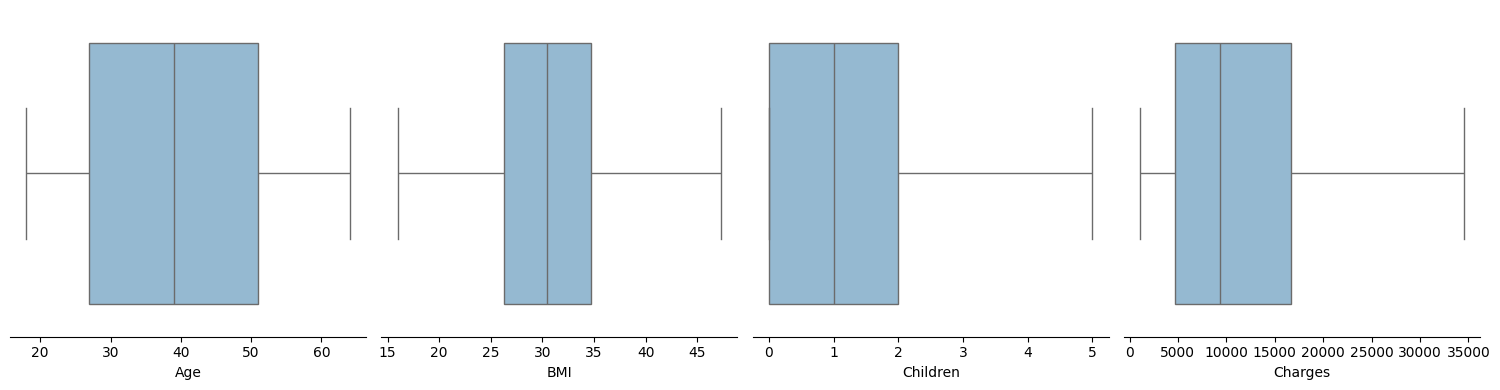

In [ ]:
# outlier detection
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))
sns.boxplot(data = df, x = 'age', ax = axs[0])
axs[0].set_xlabel('Age')
axs[0].set_yticks([])
axs[0].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'bmi', ax = axs[1])
axs[1].set_xlabel('BMI')
axs[1].set_yticks([])
axs[1].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'children', ax = axs[2])
axs[2].set_xlabel('Children')
axs[2].set_yticks([])
axs[2].spines[['left', 'top', 'right']].set_visible(False)
sns.boxplot(data = df, x = 'charges', ax = axs[3])
axs[3].set_xlabel('Charges')
axs[3].set_yticks([])
axs[3].spines[['left', 'top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

**Encoding**
- One Hot Encoding
  - Male : 1
  - Female: 0

  - Smokes: 1
  - Does not smokes: 0

- Label Encoding
  - Highly Unsatisfied: 0
  - Unsatisfied: 1
  - Average: 2
  - Satisfied: 3
  - Highly Satisfied: 4

  - Undergraduate: 0
  - Graduate: 1
  - Postgraduate: 2
  - Scholars: 3

In [ ]:
# encoding - one hot
object_columns = list(df.select_dtypes(include = 'object').columns)

df = pd.get_dummies(data = df, columns = object_columns, drop_first = True)

In [ ]:
boolean_columns = list(df.select_dtypes(include = 'bool').columns)

for column in boolean_columns:
  df[column] = df[column].astype('int')

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0,1,0,0,1
1,18.0,33.770,1.0,1725.55230,1,0,0,1,0
2,28.0,33.000,3.0,4449.46200,1,0,0,1,0
3,33.0,22.705,0.0,21984.47061,1,0,1,0,0
4,32.0,28.880,0.0,3866.85520,1,0,1,0,0


In [ ]:
# splitting data

# x - independent columns / variables
# y = dependent column / variable

# train - used for building model
# test - used to validate / evaluate model

x = df.drop('charges', axis = 1)
y = df['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
# scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # calculate the transformation and perform scaling
x_test_scaled = scaler.transform(x_test)

In [ ]:
# building linear regression model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# predictions
# predictions on training data - 80% accuracy
# predictions on test data - 75% accuracy

lr_train_prediction = lr_model.predict(x_train_scaled)
lr_test_predictions = lr_model.predict(x_test_scaled)

In [ ]:
# model evaluation - accuracy
lr_train_r2 = r2_score(y_train, lr_train_prediction)
lr_test_r2 = r2_score(y_test, lr_test_predictions)

print(lr_train_r2, lr_test_r2)

0.7461313185539173 0.7452001111302108


In [ ]:
# model evaluation - mean absolute error
lr_train_mae = mean_absolute_error(y_train, lr_train_prediction)
lr_test_mae = mean_absolute_error(y_test, lr_test_predictions)

print(lr_train_mae, lr_test_mae)

3480.134715240338 3342.2338972396915


In [ ]:
# linear regression equation
# y = mx + b + e      m : coefficient ; b : intercept (constant) ; e : error
coefficients = lr_model.coef_
intercept = lr_model.intercept_

equation = f"{intercept:.2f}"

for i, feature in enumerate(x.columns):
  equation = equation + f" + ({coefficients[i]:.2f} * {feature})"

print(equation)

12826.01 + (3126.64 * age) + (1574.14 * bmi) + (597.55 * children) + (-268.39 * sex_male) + (8172.95 * smoker_yes) + (-161.50 * region_northwest) + (-554.52 * region_southeast) + (-380.90 * region_southwest)
